<div class="alert alert-success">  
    
-------
# XArray 101 🌍  
-------
* Jupyter and Python Basics
    *  __Numpy__
    * Matplotlib
    * Pandas
* Xarray Intro
* Xarray Advanced
* Vector Data
* Remote Sensing
* Visualization

-------  
</div>

# Numpy

**Note:** This is following along/ inspired by the Notebook of Chapter 4 of the excellent [Python for Data Analysis Book](https://www.oreilly.com/library/view/python-for-data/9781491957653/) by Wes McKinney (the creator of pandas).
The original notebook is located [here](https://nbviewer.jupyter.org/github/pydata/pydata-book/blob/2nd-edition/ch04.ipynb).

Numpy is the most basic and a powerful package for working with data in Python. If you are going to work on data analysis or machine learning projects, then having a solid understanding of numpy is nearly mandatory. We will cover the basics, but it's well worth spending some time to lern it properly since it's so essential.

From the numpy docs:
> NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes. (...) NumPy’s array class is called `ndarray`. It is also known by the alias `array`.

First off, it's custom to import numpy with:

In [1]:
import numpy as np

Numpy draws it's great speed from the low-level C implementation of all functions (speed!) that's wrapped with the nice numpy package. Functions are fectorized and thus much faster than plain Python code. Observe:

In [2]:
# a ndarray and a regular list with 10e6 elements
my_arr = np.arange(1000000)
my_list = list(range(1000000))

Let's time some math operation on them. You can time a single line in Jupyter notebooks with the `%time` magic command.

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 8.98 ms, sys: 24.7 ms, total: 33.6 ms
Wall time: 31.9 ms
CPU times: user 444 ms, sys: 102 ms, total: 546 ms
Wall time: 545 ms


Ok, that's a pretty convincing argument for using `numpy` for any large numerical computations in my book 🤓 👍.

Let's check out multidimensional arrays now. We first create a 2d array with random numbers. Numpy has it's own random number module.

In [10]:
# Generate some random data
data = np.random.randn(2, 3)
data

array([[ 0.6989265 , -0.44748264, -1.64907884],
       [ 1.64167338, -0.18053314,  1.89978801]])

You can compute with them like with atomic types (ints, floats) - you cannot do this with lists since lists can contain different types as it's elements whereas numpy arrays are always of one and only one type.

In [12]:
# multiply all elements with 10, save to same array
data *= 10

# add the array with itself
data + data

array([[ 139.78530095,  -89.49652868, -329.81576806],
       [ 328.33467653,  -36.10662786,  379.95760267]])

You can query the shape and type (called dtype for data type) like this:

In [13]:
data.shape

(2, 3)

In [14]:
data.dtype

dtype('float64')

## Creating ndarrays

In [19]:
# from a list
data1 = [6, 7.5, 8, 0, 1]
a = np.array(data1)

# from a list of lists (aka 2d)
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
b = np.array(data2)

print(f'a:\n{a}\n')
print(f'b:\n{b}\n')

a:
[6.  7.5 8.  0.  1. ]

b:
[[1 2 3 4]
 [5 6 7 8]]



Let's query some properties:

In [25]:
# number of dimensions
display(b.ndim)

# shape of array
display(b.shape)

# dtype of arrays
display(a.dtype)
display(b.dtype)

2

(2, 4)

dtype('float64')

dtype('int64')

There are also many convenience functions for common arrays. Specify the required shape with a tuple of desired shape.

In [30]:
# zeros
display(np.zeros(10))
display(np.zeros((3,6)))
display(np.ones((2,3,4)))
display(np.empty((2,2)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

array([[6. , 7.5],
       [8. , 1. ]])

Observe the last one! `np.empty()` initialices an array without setting the elements. Thus, each array contains whatever the memeory position previously contained. This provides a speed benefit (often neglible) but can cause trouble if you forget to overwrite later. You hsould probably avoid it if you do not have a good reason to use it...

You can also create a range:

In [31]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Data types 

Data types are derived when arrays are defined or can be set explicitly:

In [33]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
display(arr1.dtype)
display(arr2.dtype)

dtype('float64')

dtype('int32')

You can also cast to different types:

In [35]:
arr = np.array([1, 2, 3, 4, 5])
display(arr.dtype)
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('int64')

dtype('float64')

In [38]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
display(arr)
# warning, this will change the data!
arr.astype(np.int32)

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

## Arithmetic with NumPy arrays

In [39]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
display(arr)
display(arr * arr)
display(arr - arr)

array([[1., 2., 3.],
       [4., 5., 6.]])

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [41]:
display(1 / arr)
display(arr ** 0.5)

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

You can also compute element-wise comparisons:

In [43]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
display(arr2)
arr2 > arr

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

array([[False,  True, False],
       [ True, False,  True]])

## Indexing, slicing

Something you will do a lot is indexing into arrays and slicing 
them to get a subset iof an array. It's important to know this notation!

In [45]:
arr = np.arange(10)
display(arr)

# get the 6th (!) element, remember python counts from zero
display(arr[5])

# get a slice (element 6 till and including element 7)
arr[5:8]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

5

array([5, 6, 7])

This is also something `R`-people need to pay attention to: python indexes exclusing the stop element.

Thus:
```python
a = [0,1,2,3,4]
a[2:4]

# gives:
> [2, 3] 
```

You can also assign a number to a slice:

In [46]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [47]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [49]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The following notations means: "assign value to all values":

In [51]:
arr_slice[:] = 64

**However, now comes the biggest pitfall in numpy usage! Views!** Even after 10+ years of Python I occasionally trip over it:

In [52]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Remember the line above?

```python
arr_slice = arr[5:8]
```

This actually did not create a subset copy, but rather a view of these elements (think: a shortcut to them). Thus all changes to the view will also be present in the original array!

#### Indexing into multidimensional arrays

In [55]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
display(arr2d)
arr2d[2]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([7, 8, 9])

In [59]:
# select row, then element
display(arr2d[0][2])

# select row and column in one go
display(arr2d[0, 2])

3

3

#### Indexing with slices

Often, you also use slices to index multiple elements:

In [60]:
display(arr)
arr[1:6]

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

array([ 1,  2,  3,  4, 64])

Get the first two rows:

In [62]:
display(arr2d)
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6]])

Get the first two rows, starting at the second column:

In [63]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Select all rows, only the first column.

In [66]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

#### Boolean indexing

You also can index with boolean array into another array. This is very common when working with `pandas dataframes` (see pandas notebook for examples).

In [69]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
display(names)
display(data)

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

array([[ 0.54028772, -0.34119958, -0.09683824,  0.34922594],
       [-0.6005223 ,  0.10576428, -0.47434397, -0.74262858],
       [ 1.81816442, -0.60195415, -0.71037631,  0.11463205],
       [ 0.1992259 , -1.04335948, -0.11994792,  2.01978393],
       [ 2.90715533, -1.81977625, -0.36881126, -1.34446815],
       [ 0.27000028,  0.45560469, -0.19756293,  1.93571156],
       [-1.10851901,  1.11343119,  1.95282265,  0.32594555]])

In [70]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [71]:
data[names == 'Bob']

array([[ 0.54028772, -0.34119958, -0.09683824,  0.34922594],
       [ 0.1992259 , -1.04335948, -0.11994792,  2.01978393]])

In [73]:
# all rows where boolean query Bob is true, column 3
data[names == 'Bob', 3]

array([0.34922594, 2.01978393])

You can negate a boolean index in two ways:

In [76]:
# all names but Bob
display(names != 'Bob')
# all data rows that do not belong to Bob
display(data[~(names == 'Bob')])

array([False,  True,  True, False,  True,  True,  True])

array([[-0.6005223 ,  0.10576428, -0.47434397, -0.74262858],
       [ 1.81816442, -0.60195415, -0.71037631,  0.11463205],
       [ 2.90715533, -1.81977625, -0.36881126, -1.34446815],
       [ 0.27000028,  0.45560469, -0.19756293,  1.93571156],
       [-1.10851901,  1.11343119,  1.95282265,  0.32594555]])

Often you also might see something like this:


In [77]:
# create a boolean array of the query "names == Bob"
cond = names == 'Bob'
# return all rows where query is False
data[~cond]

array([[-0.6005223 ,  0.10576428, -0.47434397, -0.74262858],
       [ 1.81816442, -0.60195415, -0.71037631,  0.11463205],
       [ 2.90715533, -1.81977625, -0.36881126, -1.34446815],
       [ 0.27000028,  0.45560469, -0.19756293,  1.93571156],
       [-1.10851901,  1.11343119,  1.95282265,  0.32594555]])

You can also chain logical/ boolean operations: `|` is the logical `OR`, `&` is the logical `AND`.

In [79]:
# True for either Bob or Will
mask = (names == 'Bob') | (names == 'Will')
display(mask)
data[mask]

array([ True, False,  True,  True,  True, False, False])

array([[ 0.54028772, -0.34119958, -0.09683824,  0.34922594],
       [ 1.81816442, -0.60195415, -0.71037631,  0.11463205],
       [ 0.1992259 , -1.04335948, -0.11994792,  2.01978393],
       [ 2.90715533, -1.81977625, -0.36881126, -1.34446815]])

In [80]:
# Assign 0 to all elements of data where data element is negative
data[data < 0] = 0
data

array([[0.54028772, 0.        , 0.        , 0.34922594],
       [0.        , 0.10576428, 0.        , 0.        ],
       [1.81816442, 0.        , 0.        , 0.11463205],
       [0.1992259 , 0.        , 0.        , 2.01978393],
       [2.90715533, 0.        , 0.        , 0.        ],
       [0.27000028, 0.45560469, 0.        , 1.93571156],
       [0.        , 1.11343119, 1.95282265, 0.32594555]])

#### Fancy indexing

Let's get fancy 🤗

In [81]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

We can *fancy* select rows (here in arbitary order) using a list of row indices:

In [82]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Even fancier: indices calculated from the end (-1: last element, -2: second last, ...):

In [83]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [84]:
arr = np.arange(32).reshape((8, 4))
display(arr)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

array([ 4, 23, 29, 10])

In [85]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

#### Transposing arrays, swapping axis

Transposing is easy: just add `.T` at the end of your array. Swapping axes is a bit more advanced.

In [88]:
# create an array form 0...14, the reshape to into 3 rows and 5 cols
arr = np.arange(15).reshape((3, 5))
display(arr)
arr.T

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [89]:
arr = np.random.randn(6, 3)
display(arr)

# calculate the dot product between transposed and regular arr
np.dot(arr.T, arr)

array([[ 0.26575982, -2.51544822, -0.43849676],
       [-0.24780182,  1.16491557,  2.52684707],
       [ 0.51040385,  0.12703331,  0.69698342],
       [-0.60061307, -0.54430146,  0.13683433],
       [-1.02547365,  1.00450019,  0.53635447],
       [-0.86038233, -0.42224553, -0.39269196]])

array([[ 2.54513613, -1.23221629, -0.68128573],
       [-1.23221629,  9.18422152,  4.76522097],
       [-0.68128573,  4.76522097,  7.52362812]])

In [92]:
arr = np.arange(16).reshape((2, 2, 4))
display(arr)

# swap dimnesion 2 and 3 (remember, we count from 0 in python)
arr.swapaxes(1, 2)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal functions

Numpy provides fast vectorized functions that opeate on all elements of arrays

In [93]:
arr = np.arange(10)
display(arr)
display(np.sqrt(arr))
display(np.exp(arr))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [95]:
x = np.random.randn(8)
y = np.random.randn(8)
display(x)
display(y)
# element-wise maximum
np.maximum(x, y)

array([ 1.07932867,  0.67434224, -0.92436158, -0.59539352, -0.23035537,
       -0.74286276, -0.56841932,  1.22760377])

array([-1.02993789,  3.07470809,  0.54436587,  0.15429618, -0.0924027 ,
       -0.0789183 ,  0.24114364,  0.10291539])

array([ 1.07932867,  3.07470809,  0.54436587,  0.15429618, -0.0924027 ,
       -0.0789183 ,  0.24114364,  1.22760377])

## Array-oriented programming

In [96]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [97]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

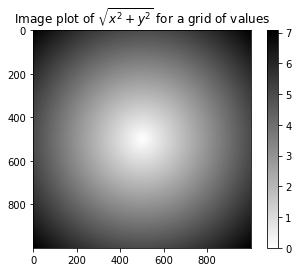

In [104]:
# we get to plotting in the next notebook, bear with me...
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray_r); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values");

### Mathematical and Statistical Methods

In [107]:
arr = np.random.randn(5, 4)
display(arr)

# the following two lines are equivalent
display(arr.mean())
display(np.mean(arr))

display(arr.sum())

array([[ 2.31828137,  0.43719512, -0.52520127,  0.15560943],
       [-0.81801748,  1.47338866, -0.45755986,  0.722514  ],
       [ 0.41846677, -0.33078957,  0.19779204, -1.86846268],
       [-0.33229347, -1.64115801,  0.68673552,  0.06075341],
       [ 3.10521662,  0.16865968, -2.1866809 , -2.05436668]])

-0.02349586463506457

-0.02349586463506457

-0.46991729270129134

The functions operate/ reduce on the entire array. If you want to apply them to a specific dimension/ axis you have to specify it:

In [109]:
# mean over columns
display(arr.mean(axis=1))

# sum over rows
display(arr.sum(axis=0))

array([ 0.59647116,  0.23008133, -0.39574836, -0.30649064, -0.24179282])

array([ 4.69165382,  0.10729588, -2.28491447, -2.98395252])

In [110]:
# cumulative sum
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [113]:
# also works over specific dimensions
arr = np.arange(9).reshape((3,3))
display(arr)
display(arr.cumsum(axis=0))
display(arr.cumprod(axis=1))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

#### Methods for boolean arrays

In [115]:
arr = np.random.randn(100)

# Number of positive values
(arr > 0).sum() 

56

`.any()` returns `True` if any element is True, `.all()` return `True` if all elements are `True`...

In [118]:
bools = np.array([False, False, True, False])
display(bools.any())
display(bools.all())

True

False

#### Sorting

In [121]:
arr = np.random.randn(6)
display(arr)
arr.sort()
arr

array([-1.52701102,  1.10579362, -0.71063493, -1.41815369, -0.50454959,
        2.44103677])

array([-1.52701102, -1.41815369, -0.71063493, -0.50454959,  1.10579362,
        2.44103677])

In [125]:
arr = np.random.randn(5, 3)
display(arr)

# sort over axis 1: columns
arr.sort(axis=1)
arr

array([[-0.29541   ,  0.70694797,  1.77367683],
       [ 0.31205921, -1.63278108,  0.33288739],
       [ 0.15090882,  0.52980457, -0.48992774],
       [ 1.10034317,  0.27224496,  0.55089905],
       [ 0.83483141, -0.00196031, -0.39845866]])

array([[-0.29541   ,  0.70694797,  1.77367683],
       [-1.63278108,  0.31205921,  0.33288739],
       [-0.48992774,  0.15090882,  0.52980457],
       [ 0.27224496,  0.55089905,  1.10034317],
       [-0.39845866, -0.00196031,  0.83483141]])

#### Unique and Other Set Logic

In [127]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
display(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
display(np.unique(ints))

array(['Bob', 'Joe', 'Will'], dtype='<U4')

array([1, 2, 3, 4])

You can also use a `set()`:

In [128]:
sorted(set(names))

['Bob', 'Joe', 'Will']

... check if elements are contained in a specified list of values:

In [129]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File input/ ouput

You can easily save and load arrays to/ from disc.

In [130]:
arr = np.arange(10)

#save array, uses .npy suffix by default
np.save('some_array', arr)

In [133]:
b = np.load('some_array.npy')
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can also save an array archive:

In [134]:
np.savez('array_archive.npz', a=arr, b=arr)

In [135]:
# load it again and access element with key 'b'
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Quite often you'll find compressed arrays in the wild. Create them like this:

In [137]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [138]:
# cleanup the files
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

...

In [139]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
display(x)
display(y)
x.dot(y)

array([[1., 2., 3.],
       [4., 5., 6.]])

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

array([[ 28.,  64.],
       [ 67., 181.]])

In [141]:
# equivalent to this command...
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In Python3 you can also use `@` for a dot product. The following two lines are equivalent:

In [145]:
display(np.dot(x, np.ones(3)))
display(x @ np.ones(3))

array([ 6., 15.])

array([ 6., 15.])

A more complex example... Feel free to dig into the help pages or consult the [numpy docs](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

In [146]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-8.36138797,  8.15036622,  3.53766717, -0.42970731,  4.85608253],
       [ 0.        , -8.88611679,  6.22015265, 11.74229749, -5.80323694],
       [ 0.        ,  0.        , -3.1128244 , -5.54580404, -1.47918957],
       [ 0.        ,  0.        ,  0.        , -2.29522789,  0.21286787],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.38047079]])

## Pseudorandom Number Generation

In [148]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.01513295,  0.85292616,  0.98400532,  0.99040304],
       [ 1.1124753 , -1.30550628,  0.49214075, -0.4508984 ],
       [-0.03370642, -0.69464705, -0.97792146, -0.57975695],
       [-0.16460735, -0.26227288,  0.08173703,  1.06422245]])

Use the numpy random number generator. They are so much faster... Also, there are all cinds of options (see the [docs](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)).

In [149]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1.03 s ± 4.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.5 ms ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Example: Random Walks

Let's consider a simple random walk. In pure Python the code would be (single random walk with 1000 steps):

In [159]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

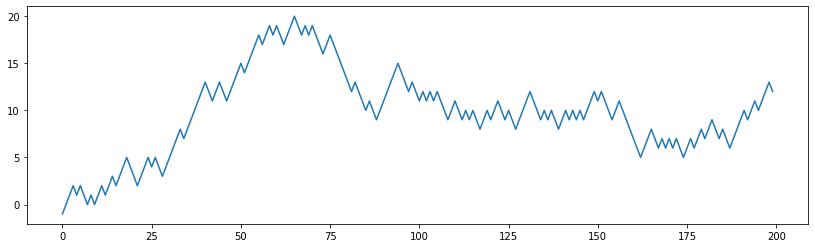

In [179]:
plt.figure(figsize=(14,4))

# only show the first 200 steps
plt.plot(walk[:200]);

The walk is simply the `cumsum()` of the steps. Thus, the walk `min()` and `max()` on the cumsum give us the extremes.

In [161]:
np.random.seed(12345)
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [164]:
display(walk.min())
display(walk.max())

-3

31

If we want to find out the crossing time (the time when a value was reached,  where the walk crossed a threshold) we can calculateit like this...

In [177]:
(np.abs(walk) >= 10).argmax()

37

### Simulating Many Random Walks at Once

Now let's create 5000 random walks! A simple modification of the above code gets us there...

In [180]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -1, ...,  40,  41,  40],
       [  1,   2,   3, ..., -46, -45, -46],
       [  1,   2,   1, ...,   4,   3,   2],
       ...,
       [ -1,   0,   1, ...,  18,  17,  16],
       [ -1,   0,  -1, ...,  26,  25,  26],
       [  1,   0,  -1, ...,  24,  25,  26]])

In [181]:
# max and min over all walks
display(walks.max())
display(walks.min())

121

-110

We now want to calculate the crossing time for 30 or -30. Since -30 is not reached by all walks (they are biased upwards) we have to only get the proper ones with the `.any(1)` statement.

In [168]:
hits30 = (np.abs(walks) >= 30).any(1)
display(hits30)
hits30.sum() # Number that hit 30 or -30

array([False,  True, False, ..., False,  True, False])

3410

We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level and call `argmax` across axis 1 to get the crossing times:

In [169]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [171]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))
steps

array([[-0.32675878,  0.12487648,  0.26982897, ...,  0.26711729,
         0.30356875,  0.07789714],
       [ 0.23663815,  0.0654996 ,  0.19363394, ..., -0.25102487,
        -0.04385329,  0.02552076],
       [ 0.0383607 , -0.15574272, -0.63058156, ...,  0.15926198,
        -0.02333714, -0.02088125],
       ...,
       [ 0.14075607, -0.29957857, -0.29047629, ..., -0.23263404,
         0.22589486,  0.49953148],
       [ 0.0357404 ,  0.31781403,  0.01680157, ...,  0.25281928,
        -0.04080643,  0.12800036],
       [-0.02947885,  0.31655579,  0.19687793, ...,  0.385509  ,
         0.22271146,  0.25352059]])